In [1]:
# perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X= iris.data[:, (2,3)]
y= (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, .5]])
y_pred

array([0])

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(42)
def show_images(sample_num=40, n_cols=10):
    n_rows = math.ceil(sample_num / n_cols)
    plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            if index >= sample_num:
                break
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.show()

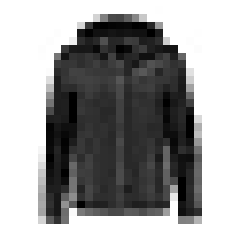

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

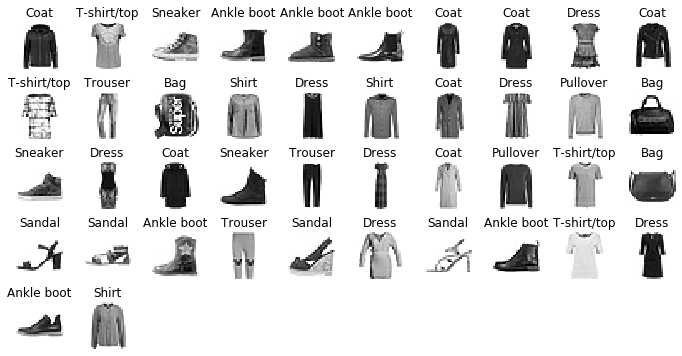

In [13]:
show_images(sample_num=42)

In [14]:
# sequential
# hidden layer = 2
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')]
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


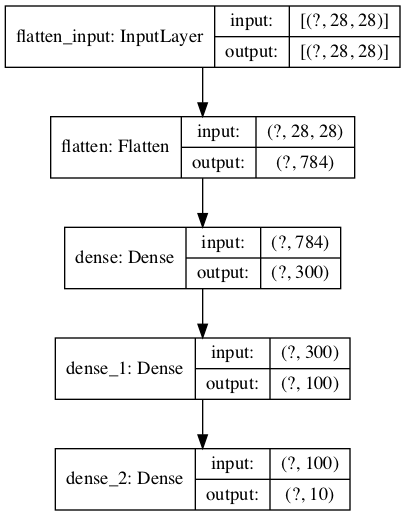

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]

In [19]:
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

In [21]:
w, b = hidden1.get_weights()

In [22]:
w

array([[-0.02353818,  0.04695226,  0.01205   , ..., -0.01070143,
         0.00080067,  0.04886353],
       [ 0.05092657,  0.05337776,  0.0502504 , ...,  0.05829141,
        -0.05475129, -0.06326672],
       [ 0.01196014, -0.07173855, -0.00151742, ...,  0.06353304,
        -0.01230869, -0.03261094],
       ...,
       [-0.04753094, -0.01818904, -0.06629294, ...,  0.07160042,
        -0.03206403, -0.07078223],
       [ 0.04250057, -0.02803122, -0.05154817, ...,  0.00969125,
         0.01667619,  0.03999545],
       [-0.04767776,  0.01175647, -0.03079079, ..., -0.04027282,
        -0.04266372, -0.02726539]], dtype=float32)

In [23]:
w.shape

(784, 300)

In [24]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
b.shape

(300,)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.7136 - accuracy: 0.7662 - val_loss: 0.5375 - val_accuracy: 0.8094
Epoch 2/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4897 - accuracy: 0.8282 - val_loss: 0.4858 - val_accuracy: 0.8208
Epoch 3/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4445 - accuracy: 0.8446 - val_loss: 0.4437 - val_accuracy: 0.8458
Epoch 4/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4171 - accuracy: 0.8533 - val_loss: 0.4266 - val_accuracy: 0.8544
Epoch 5/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3967 - accuracy: 0.8607 - val_loss: 0.3923 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3784 - accuracy: 0.8667 - val_loss: 0.3713 - val_accuracy: 0.8686
Epoch 7/30
55000/55000 [==============================] -

In [68]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 363,
 'samples': 11610,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [29]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

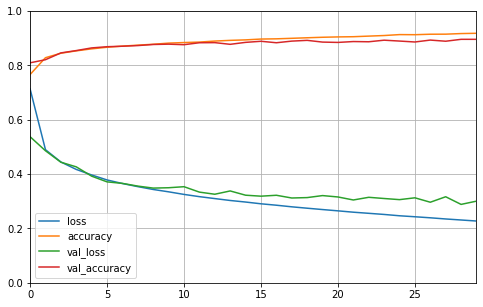

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3262 - accuracy: 0.8847


[0.3261837657153606, 0.8847]

In [32]:
model.evaluate(X_test, y_test, batch_size=64)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3262 - accuracy: 0.8847


[0.32618376092910767, 0.8847]

In [33]:
X_new = X_test[:3]

In [34]:
y_proba = model.predict(X_new)

In [35]:
y_proba

array([[1.4875512e-05, 1.3144548e-06, 2.1025191e-06, 3.4786051e-06,
        1.0070805e-05, 1.7048413e-02, 8.4836956e-06, 1.2876078e-02,
        4.1651822e-04, 9.6961874e-01],
       [2.0009307e-05, 1.7700513e-08, 9.8920780e-01, 5.2299892e-08,
        1.0707694e-02, 8.7348469e-11, 6.4410175e-05, 1.4393954e-12,
        7.0875177e-09, 2.0777177e-11],
       [2.7404863e-06, 9.9999595e-01, 4.5035637e-08, 7.7631631e-07,
        3.6742733e-07, 1.2776655e-12, 1.4745753e-08, 3.2186098e-10,
        1.9800075e-09, 1.7770342e-10]], dtype=float32)

In [36]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(X_new)

In [38]:
y_pred

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [41]:
# fetch_clifornia_housing

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer ='sgd')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.9725 - val_loss: 0.6478
Epoch 2/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4957 - val_loss: 0.5046
Epoch 3/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4568 - val_loss: 0.4753
Epoch 4/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4372 - val_loss: 0.4615
Epoch 5/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4264 - val_loss: 0.4446
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4149 - val_loss: 0.4363
Epoch 7/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4075 - val_loss: 0.4355
Epoch 8/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4012 - val_loss: 0.4263
Epoch 9/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3965 - val_l

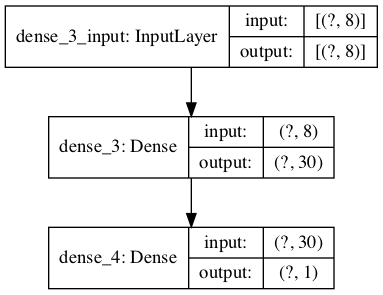

In [43]:
keras.utils.plot_model(model, show_shapes=True)

In [44]:
# wide and deep
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

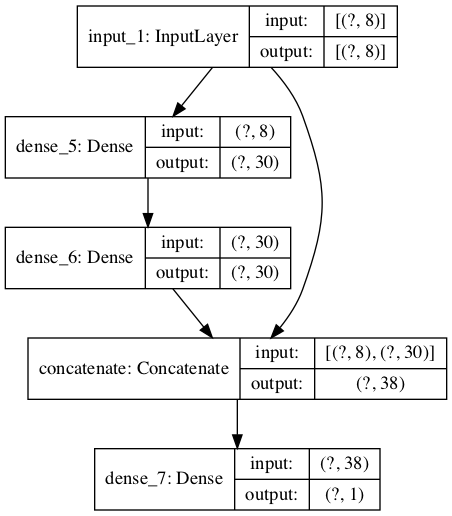

In [45]:
keras.utils.plot_model(model, show_shapes=True)

In [46]:
# wide and deep of seperate feature

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=output)

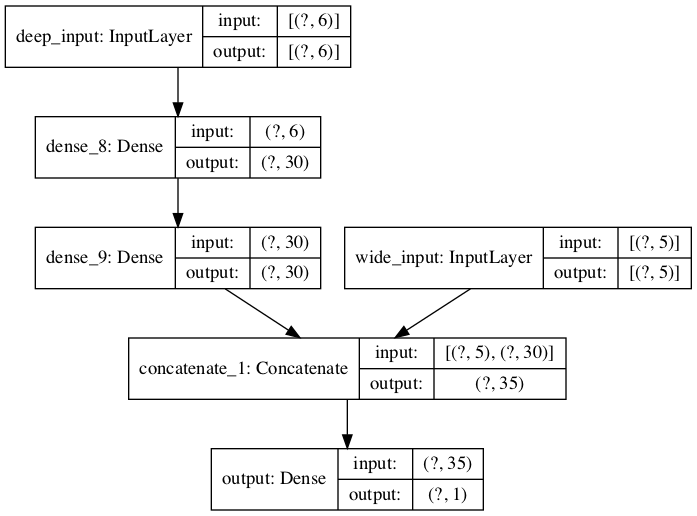

In [47]:
keras.utils.plot_model(model, show_shapes=True)

In [48]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [49]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [50]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A,X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A,X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 52us/sample - loss: 2.1418 - val_loss: 1.0048
Epoch 2/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.8504 - val_loss: 0.7566
Epoch 3/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.7196 - val_loss: 0.6913
Epoch 4/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6678 - val_loss: 0.6507
Epoch 5/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6328 - val_loss: 0.6233
Epoch 6/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6049 - val_loss: 0.5986
Epoch 7/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5814 - val_loss: 0.5794
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5626 - val_loss: 0.5624
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5467 - val_l

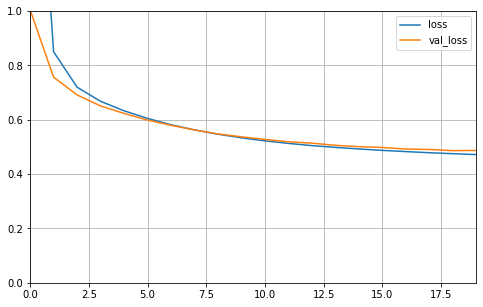

In [51]:
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.58976537],
       [1.882448  ],
       [2.926932  ]], dtype=float32)

In [53]:
# multi output

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

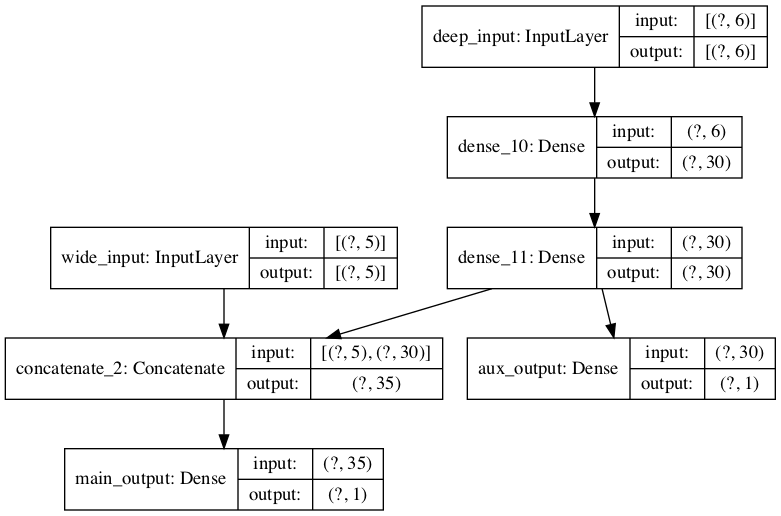

In [54]:
keras.utils.plot_model(model, show_shapes=True)

In [55]:
model.compile(loss=['mse', 'mse'], loss_weights=[.9, .1], optimizer='sgd')

In [56]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
                   validation_data=([X_valid_A,X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A,X_new_B])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.9740 - main_output_loss: 0.8337 - aux_output_loss: 2.2363 - val_loss: 0.6569 - val_main_output_loss: 0.5749 - val_aux_output_loss: 1.3933
Epoch 2/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5989 - main_output_loss: 0.5264 - aux_output_loss: 1.2505 - val_loss: 0.5914 - val_main_output_loss: 0.5279 - val_aux_output_loss: 1.1626
Epoch 3/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5415 - main_output_loss: 0.4840 - aux_output_loss: 1.0598 - val_loss: 0.5348 - val_main_output_loss: 0.4853 - val_aux_output_loss: 0.9797
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5043 - main_output_loss: 0.4600 - aux_output_loss: 0.9024 - val_loss: 0.5176 - val_main_output_loss: 0.4801 - val_aux_output_loss: 0.8545
Epoch 5/20
11610/11610 [==============================] - 0s 42us/s

In [57]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

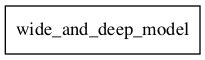

In [58]:
keras.utils.plot_model(model, show_shapes=True)

In [59]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [62]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

ValueError: Error when checking input: expected flatten_1_input to have 3 dimensions, but got array with shape (11610, 8)

In [63]:
# model.save('my_keras_model.h5')
X_train.shape

(11610, 8)

In [ ]:
model = keras.models.load_model('my_keras_model.h5')

In [64]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 49us/sample - loss: 1.8329 - val_loss: 0.8010
Epoch 2/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.7334 - val_loss: 0.6487
Epoch 3/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6181 - val_loss: 0.6009
Epoch 4/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5767 - val_loss: 0.5713
Epoch 5/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5489 - val_loss: 0.5480
Epoch 6/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5273 - val_loss: 0.5305
Epoch 7/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5101 - val_loss: 0.5158
Epoch 8/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4966 - val_loss: 0.5048
Epoch 9/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4857 - val_l

In [69]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4704 - val_loss: 0.4845
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4645 - val_loss: 0.4779
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4601 - val_loss: 0.4744
Epoch 4/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4558 - val_loss: 0.4704
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4522 - val_loss: 0.4670
Epoch 6/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4490 - val_loss: 0.4646
Epoch 7/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4461 - val_loss: 0.4615
Epoch 8/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4436 - val_loss: 0.4596
Epoch 9/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.440

In [75]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval / train : {:.2f}'.format(logs['val_loss']/logs['loss']))

In [76]:
print_val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                   callbacks=[print_val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
 9728/11610 [========================>.....] - ETA: 0s - loss: 0.3575
val / train : 1.07
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3539 - val_loss: 0.3792
Epoch 2/100
 9888/11610 [========================>.....] - ETA: 0s - loss: 0.3552
val / train : 1.09
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3515 - val_loss: 0.3845
Epoch 3/100
10272/11610 [=========================>....] - ETA: 0s - loss: 0.3504
val / train : 1.08
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3514 - val_loss: 0.3778
Epoch 4/100
10816/11610 [==========================>...] - ETA: 0s - loss: 0.3513
val / train : 1.09
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3500 - val_loss: 0.3829
Epoch 5/100
 9760/11610 [========================>.....] - ETA: 0s - loss: 0.3537
val / train : 1.07
11610/11610 [==============================] - 0s 32us/sample 

In [82]:
# tensor board
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [81]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2809 - val_loss: 0.3188
Epoch 2/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.2808 - val_loss: 0.3194
Epoch 3/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2805 - val_loss: 0.3209
Epoch 4/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.2801 - val_loss: 0.3190
Epoch 5/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2809 - val_loss: 0.3200
Epoch 6/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2821 - val_loss: 0.3175
Epoch 7/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.2792 - val_loss: 0.3197
Epoch 8/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2806 - val_loss: 0.3179
Epoch 9/30
11610/11610 [==============================] - 0s 43us/sample - loss: 0.2787 - val_l

In [83]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=200,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2770 - val_loss: 0.3138
Epoch 2/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2758 - val_loss: 0.3132
Epoch 3/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2758 - val_loss: 0.3165
Epoch 4/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2758 - val_loss: 0.3139
Epoch 5/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2756 - val_loss: 0.3157
Epoch 6/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2769 - val_loss: 0.3139
Epoch 7/200
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2753 - val_loss: 0.3160
Epoch 8/200
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2765 - val_loss: 0.3138
Epoch 9/200
11610/11610 [==============================] - 0s 40us/sample - loss: 0.275

In [89]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=7777

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [88]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1001):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2)* step/100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2,32,32,3)
        tf.summary.image('my_images', images*step/1000, step=step)
        texts = ['The step is ' + str(step) , 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000*2 *np.pi * step)
        audio= tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=40000, step=step)

test_logdir

In [90]:
test_logdir

'./my_logs/run_2020_05_24_14_22_39'

In [91]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape= input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [92]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [93]:
keras_reg.fit(X_train, y_train, epochs=10,
             validation_data = (X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 45us/sample - loss: 1.1396 - val_loss: 0.7753
Epoch 2/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7102 - val_loss: 0.6646
Epoch 3/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6183 - val_loss: 0.5965
Epoch 4/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5619 - val_loss: 0.5534
Epoch 5/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5252 - val_loss: 0.5265
Epoch 6/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5026 - val_loss: 0.5105
Epoch 7/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4861 - val_loss: 0.4971
Epoch 8/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4739 - val_loss: 0.4890
Epoch 9/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4645 - val_l

In [94]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden' : [0, 1, 2, 3, 4],
    'n_neurons' : np.arange(1, 100),
    'learning_rate' : reciprocal(3e-4, 3e-2),
}

In [99]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data = (X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7485 - val_loss: 0.5540
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4939 - val_loss: 0.4882
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4400 - val_loss: 0.4501
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4221 - val_loss: 0.4637
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4144 - val_loss: 0.4298
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4001 - val_loss: 0.4475
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3927 - val_loss: 0.4255
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3856 - val_loss: 0.4292
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3799 - val_loss: 0.420

KeyboardInterrupt: 

In [101]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [102]:
rnd_search_cv.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'